## Cheat sheet:
* Tab ist autocompletion
* d+d löscht
* i+i interrupted
* a / b für neue Zelle above/below ein 

## Let's do some imports

In [1]:
import numpy as numpy
import matplotlib.pyplot as pyplot

## And now for a plot ...

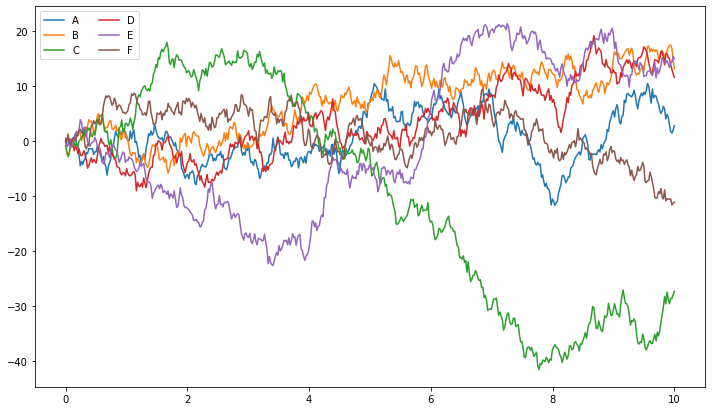

In [2]:
x = numpy.linspace(0, 10, 500)
y = numpy.cumsum(numpy.random.randn(500, 6), 0)
pyplot.figure(figsize=(12, 7))
pyplot.plot(x, y)
pyplot.legend('ABCDEF', ncol=2, loc='upper left')

## But actually, we want to analyze repos 

In [3]:
from git import Repo 
from datetime import datetime
import matplotlib as matplotlib

In [4]:
repo = Repo.init('scylla.git', bare=True)

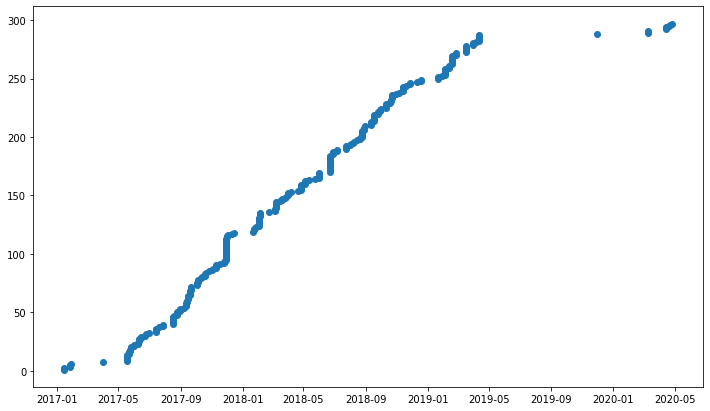

In [5]:
commits = repo.iter_commits()
timestamps = list(map(lambda commit: datetime.fromtimestamp(commit.committed_date), commits))
# for stamp in timestamps:
#    print(stamp)
count = list(range(len(timestamps), 0, -1))    
dates = matplotlib.dates.date2num(timestamps)
matplotlib.pyplot.figure(figsize=(12, 7))
matplotlib.pyplot.plot_date(dates, count)

Let's use the github API shall we?

In [6]:
import json
import requests
from pandas.io.json import json_normalize
import pandas as pandas

In [7]:
github_api = "https://api.github.com"
gh_session = requests.Session()
gh_session.auth = ('leonbein', '2d220172af07d73f3d69ef251f2d3b68954c9350')

In [8]:
url = github_api + '/user/repos?type=all&per_page=100'
commits = gh_session.get(url = url)
commits_json = commits.json()
commits_json = list(map(lambda x: x['full_name'], commits_json))
for each in commits_json:
    print(each)

BraunTom/TrueTurnTurnTurn
LeonBein/DummyRepository
LeonBein/MensaWidget
LeonBein/SmalltalkGitTesting
LeonBein/Squot
LeonBein/Talos
ShirleyNekoDev/Squot-CoAuthors


# Stuff from the other side

In [2]:
import numpy as numpy
import matplotlib.pyplot as pyplot

In [4]:
from utils import *
import utils

### Exploratory queries:

Map sample commits to "raw commits"

In [4]:
runQuery('''
    SELECT *
    FROM crm20.lb_sample_commits, ght.raw_commits
    WHERE lb_sample_commits.sha = raw_commits.sha
''')

,commit_id,sha,author_id,sha,login,timestamp,email,name,message,additions,deletions
0,616526760,6bb79b2e8956fe6493d7a65643a722a30e35ce3a,3211235,6bb79b2e8956fe6493d7a65643a722a30e35ce3a,bswalsh,2017-02-11T02:45:58Z,bswalsh@andrew.cmu.edu,bswalsh,Added sprites and the debugging ability to cli...,165,1548
1,616526734,2212ad2ec00f923c31f31879937e8a4d4ebfd657,3211235,2212ad2ec00f923c31f31879937e8a4d4ebfd657,bswalsh,2017-02-10T22:40:42Z,noreply@github.com,GitHub,Merge pull request #7 from eosofsky/Brian\n\na...,152,8
2,616526739,e914c2c85296ee26b3229bf22a5c12b9b721fb93,3211235,e914c2c85296ee26b3229bf22a5c12b9b721fb93,bswalsh,2017-02-12T16:42:53Z,bswalsh@andrew.cmu.edu,bswalsh,Adding sprite click ability and re-rendering s...,81,83
3,615193816,711660b5df1c82fb03e74b7539b547216d588c0b,2800979,711660b5df1c82fb03e74b7539b547216d588c0b,jmjuanes,2017-02-06T09:35:17Z,josemijuanes@gmail.com,jmjuanes,test/hello.js: updated test name,1,1
4,615193817,ed51dbf16af77d39181b3b5984c7bceb8f4ce3a1,2800979,ed51dbf16af77d39181b3b5984c7bceb8f4ce3a1,jmjuanes,2017-02-06T09:35:30Z,josemijuanes@gmail.com,jmjuanes,lib/body.js: check if is tty,4,0
...,...,...,...,...,...,...,...,...,...,...,...
103262,133304435,80d53cc1e4e3f362340a469968d3a7fa445f2799,4496948,80d53cc1e4e3f362340a469968d3a7fa445f2799,bineshdobhal,2014-07-03T16:44:12Z,bineshdobhal@gmail.com,Binesh Dobhal,Fresh Code\n\nFresh Code,31068,0
103263,616317927,47071a4bd747de144a28b5d9a58dab09cd025664,2800979,47071a4bd747de144a28b5d9a58dab09cd025664,jmjuanes,2017-02-12T12:28:58Z,josemijuanes@gmail.com,jmjuanes,package.json: v2.0.0,8,7
103264,616317928,c14845b997a9e9caae414da231db108aee203243,2800979,c14845b997a9e9caae414da231db108aee203243,jmjuanes,2017-02-12T12:28:44Z,josemijuanes@gmail.com,jmjuanes,Build v2.0.0,839,475
103265,616318041,1aae930f5cf1d15ba4aef8790f89ddf1d85e10e6,2800979,1aae930f5cf1d15ba4aef8790f89ddf1d85e10e6,jmjuanes,2016-12-08T19:31:47Z,josemijuanes@gmail.com,jmjuanes,src/_font.scss: added font mixin,20,0


Time used: 3774.4781992435455


,commit_id,sha,author_id,sha,login,timestamp,email,name,message,additions,deletions
0,616526760,6bb79b2e8956fe6493d7a65643a722a30e35ce3a,3211235,6bb79b2e8956fe6493d7a65643a722a30e35ce3a,bswalsh,2017-02-11T02:45:58Z,bswalsh@andrew.cmu.edu,bswalsh,Added sprites and the debugging ability to cli...,165,1548
1,616526734,2212ad2ec00f923c31f31879937e8a4d4ebfd657,3211235,2212ad2ec00f923c31f31879937e8a4d4ebfd657,bswalsh,2017-02-10T22:40:42Z,noreply@github.com,GitHub,Merge pull request #7 from eosofsky/Brian\n\na...,152,8
2,616526739,e914c2c85296ee26b3229bf22a5c12b9b721fb93,3211235,e914c2c85296ee26b3229bf22a5c12b9b721fb93,bswalsh,2017-02-12T16:42:53Z,bswalsh@andrew.cmu.edu,bswalsh,Adding sprite click ability and re-rendering s...,81,83
3,615193816,711660b5df1c82fb03e74b7539b547216d588c0b,2800979,711660b5df1c82fb03e74b7539b547216d588c0b,jmjuanes,2017-02-06T09:35:17Z,josemijuanes@gmail.com,jmjuanes,test/hello.js: updated test name,1,1
4,615193817,ed51dbf16af77d39181b3b5984c7bceb8f4ce3a1,2800979,ed51dbf16af77d39181b3b5984c7bceb8f4ce3a1,jmjuanes,2017-02-06T09:35:30Z,josemijuanes@gmail.com,jmjuanes,lib/body.js: check if is tty,4,0
...,...,...,...,...,...,...,...,...,...,...,...
103262,133304435,80d53cc1e4e3f362340a469968d3a7fa445f2799,4496948,80d53cc1e4e3f362340a469968d3a7fa445f2799,bineshdobhal,2014-07-03T16:44:12Z,bineshdobhal@gmail.com,Binesh Dobhal,Fresh Code\n\nFresh Code,31068,0
103263,616317927,47071a4bd747de144a28b5d9a58dab09cd025664,2800979,47071a4bd747de144a28b5d9a58dab09cd025664,jmjuanes,2017-02-12T12:28:58Z,josemijuanes@gmail.com,jmjuanes,package.json: v2.0.0,8,7
103264,616317928,c14845b997a9e9caae414da231db108aee203243,2800979,c14845b997a9e9caae414da231db108aee203243,jmjuanes,2017-02-12T12:28:44Z,josemijuanes@gmail.com,jmjuanes,Build v2.0.0,839,475
103265,616318041,1aae930f5cf1d15ba4aef8790f89ddf1d85e10e6,2800979,1aae930f5cf1d15ba4aef8790f89ddf1d85e10e6,jmjuanes,2016-12-08T19:31:47Z,josemijuanes@gmail.com,jmjuanes,src/_font.scss: added font mixin,20,0


Note: The following query filters by having more than 100 commits. This also filters out all organizations

In [ ]:
runQuery('''
    SELECT users.id, COUNT(commit_id), type
    FROM ght.users, 
        (SELECT *
        FROM crm20.lb_sample_commits, ght.commits
        WHERE commit_id = id) as commits
    WHERE users.id = author_id
    GROUP BY users.id
    HAVING COUNT(commit_id) >= 200
''')

Explore patches

In [19]:
runQuery('''
    SELECT *, SUBSTRING(name from '\.([^\.]*)$') AS file_ending, (changes - deletions) AS additions
    FROM ght.raw_patches
    LIMIT 100
''')

Time used: 0.21149420738220215


,sha,name,previous_filename,changes,deletions,status,patch,file_ending,additions
0,c3f2a28a51466be1282e757d32878cd0334f16a6,gulpfile.js,,42,15,modified,"@@ -10,7 +10,8 @@ var gulp = require('gulp'),\...",js,27
1,c3f2a28a51466be1282e757d32878cd0334f16a6,package.json,,1,0,modified,"@@ -25,6 +25,7 @@\n ""watchify"": ""^3.3.1""\n...",json,1
2,c3f2a28a51466be1282e757d32878cd0334f16a6,src/index.html,,1,0,modified,"@@ -4,4 +4,5 @@\n <link rel=""stylesheet"" hre...",html,1
3,c3f2a28a51466be1282e757d32878cd0334f16a6,src/js/app.js,,4,2,modified,"@@ -2,10 +2,10 @@ var multiply = require('./mu...",js,2
4,c3f2a28a51466be1282e757d32878cd0334f16a6,src/stylus/components/_components.styl,,2,1,modified,"@@ -1,2 +1,2 @@\n body \n- background yellow\...",styl,1
...,...,...,...,...,...,...,...,...,...
95,4e950fdf8cbd5a8b001be640046f98935c08ce61,gulp-plumber/gulp-plumber.d.ts,,2,1,modified,"@@ -41,7 +41,7 @@ declare module 'gulp-plumber...",ts,1
96,58fe0b0e72fbea01c059d507512cdedf30d5272d,gulp-plumber/gulp-plumber-tests.ts,,36,0,added,"@@ -0,0 +1,36 @@\n+/// <reference path=""../nod...",ts,36
97,58fe0b0e72fbea01c059d507512cdedf30d5272d,gulp-plumber/gulp-plumber.d.ts,,51,0,added,"@@ -0,0 +1,51 @@\n+// Type definitions for gul...",ts,51
98,4d137804c3bef2dcba7bbb7a1160906713b308c3,Definizione di Prodotto/documents/editor.tex,,1158,60,modified,"@@ -44,7 +44,7 @@ \subsubsection{premi/client/...",tex,1098


### Get patches for all sample commits

In [13]:
runQuery('''
    SELECT commit_id, lb_sample_commits.sha, (changes - deletions) AS additions, SUBSTRING(name from '\.([^\.]*)$') AS file_ending
    FROM crm20.lb_sample_commits, ght.raw_patches
    WHERE lb_sample_commits.sha = raw_patches.sha
''')

ProgrammingError: (psycopg2.errors.SyntaxError) syntax error at or near "GROUP"
LINE 6:     GROUP BY file_ending
            ^

[SQL: 
    SELECT COUNT(commit_id), SUBSTRING(name from '\.([^\.]*)$') AS file_ending
    FROM crm20.lb_sample_commits, ght.raw_patches
    WHERE lb_sample_commits.sha = raw_patches.sha AND changes = 0
    LIMIT 100
    GROUP BY file_ending
]
(Background on this error at: http://sqlalche.me/e/f405)

In [ ]:
runQuery('''
    SELECT MIN(created_at)
    FROM ght.commits
    LIMIT 10
''')

### Reference with srcml

In [202]:
import subprocess
from lxml import etree

repo = Repo.init(repoFolder+'scylla.git', bare=True, odbt=GitDB)
commit = repo.active_branch.commit
namespaces = {'src': 'http://www.srcML.org/srcML/src'}

start = time.time()
for obj in commit.tree.traverse():
    if obj.type == 'blob' and obj.name.endswith('.java'):
        content = subprocess.check_output('git --git-dir="./scylla.git" show %s:%s | xargs -0 srcml -l Java --text' % (commit.hexsha, obj.path), shell=True)
        tree = etree.fromstring(content)
        functions = tree.xpath('//src:function/src:block', namespaces=namespaces)
        print(list(map(lambda func: len(etree.tostring(func).decode('utf-8').split('\\n')), functions)))
        metric = 0
        print(obj.name+': '+str(metric))
end = time.time()
print('Time used: '+str(end - start))

src/main/java/de/hpi/bpt/scylla/Scylla.java
src/main/java/de/hpi/bpt/scylla/ScyllaScripts.java
src/main/java/de/hpi/bpt/scylla/SimulationManager.java
src/main/java/org/eclipse/wb/swing/FocusTraversalOnArray.java
src/test/java/de/hpi/bpt/scylla/ArgumentTests.java
src/test/java/de/hpi/bpt/scylla/SeedProvider.java
src/test/java/de/hpi/bpt/scylla/SimulationManagerForTests.java
src/test/java/de/hpi/bpt/scylla/SimulationTest.java
src/test/java/de/hpi/bpt/scylla/TestSeeds.java
src/test/java/de/hpi/bpt/scylla/TestUtils.java
src/test/java/de/hpi/bpt/scylla/TravisTests.java
src/main/java/de/hpi/bpt/scylla/GUI/CheckBoxList.java
src/main/java/de/hpi/bpt/scylla/GUI/CheckboxListPanel.java
src/main/java/de/hpi/bpt/scylla/GUI/Console.java
src/main/java/de/hpi/bpt/scylla/GUI/EditorPane.java
src/main/java/de/hpi/bpt/scylla/GUI/EditorTabTitlePanel.java
src/main/java/de/hpi/bpt/scylla/GUI/ExpandPanel.java
src/main/java/de/hpi/bpt/scylla/GUI/ExtendedListChooserPanel.java
src/main/java/de/hpi/bpt/scylla/GUI

In [208]:
content = subprocess.check_output('git --git-dir="./scylla.git" show %s:%s | xargs -0 srcml -l Java --text' % (commit.hexsha, 'src/main/java/de/hpi/bpt/scylla/Scylla.java'), shell=True)
tree = etree.fromstring(content)
functions = tree.xpath('//src:function', namespaces=namespaces)
for x in list(map(lambda func: etree.tostring(func).decode('utf-8'), functions)):
    print('')
    print(x)
print(list(map(lambda func: len(etree.tostring(func).decode('utf-8').split('\n')), functions)))
metric = 0
print('Scylla.java: '+str(metric))


<function xmlns="http://www.srcML.org/srcML/src"><specifier>public</specifier> <specifier>static</specifier> <type><name>void</name></type> <name>main</name><parameter_list>(<parameter><decl><type><name><name>String</name><index>[]</index></name></type> <name>args</name></decl></parameter>)</parameter_list> <throws>throws <argument><expr><name>IllegalArgumentException</name></expr></argument></throws> <block>{

        <if>if <condition>(<expr><call><name><name>Arrays</name><operator>.</operator><name>stream</name></name><argument_list>(<argument><expr><name>args</name></expr></argument>)</argument_list></call><operator>.</operator><call><name>anyMatch</name><argument_list>(<argument><expr><lambda><parameter_list type="pseudo"><parameter><decl><name>x</name></decl></parameter></parameter_list> -&gt; <block type="pseudo"><expr><call><name><name>x</name><operator>.</operator><name>contains</name></name><argument_list>(<argument><expr><literal type="string">"--help"</literal></expr></arg

In [5]:
{x : x*x for x in range(5)}

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}